In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import cv2
from skimage.filters import sobel

# Dúvida: Arquivo 1.txt contém os locais das assinaturas?

# Conceitos vistos em sala:
# 1- Operações pontuais
# 2- Equalização histogrâmica
# 3- Filtros: gaussiano, média, mediana
# 4- Operações morfológicas <<
# 5- Transformada de Hough <<
# 6- Transformações geométricas (zoom/interpolação)

# 

## Imagem 1

230 0 (4000, 3000)


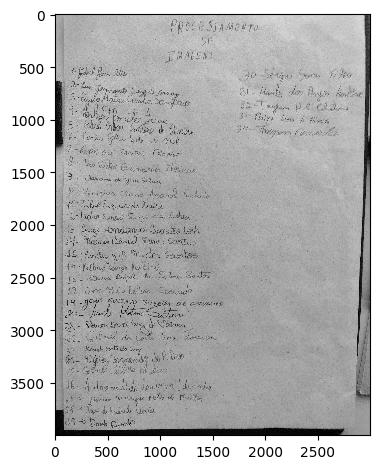

In [2]:
img = (io.imread("base-de-dados/1.jpg",as_gray=True)*255).astype("uint8")
altura,largura = img.shape
print(img.max(), img.min(), img.shape)
io.imshow(img)

### Usar opencv para desenhar um retângulo na imagem

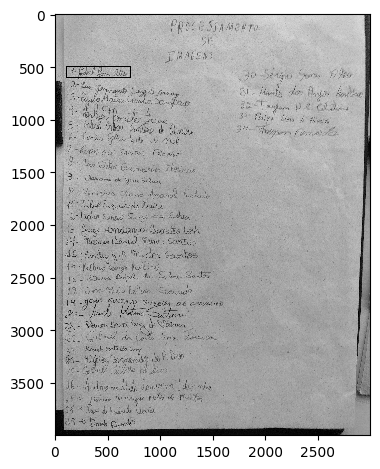

In [3]:
# https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html

# Usar os valores da imagem.txt para desenhar o quadrado
# target(tipo de alvo-assinatura) coordenadas (pontocentralX pontocentralY) (largura altura)
top_left = (110,500)
bot_right = (720,600)
cv2.rectangle(img, top_left, bot_right, color=(0,0,255), thickness=7)
io.imshow(img)
img = (io.imread("base-de-dados/1.jpg",as_gray=True)*255).astype("uint8")

## Histograma
Provavelmente não vai ajudar muito

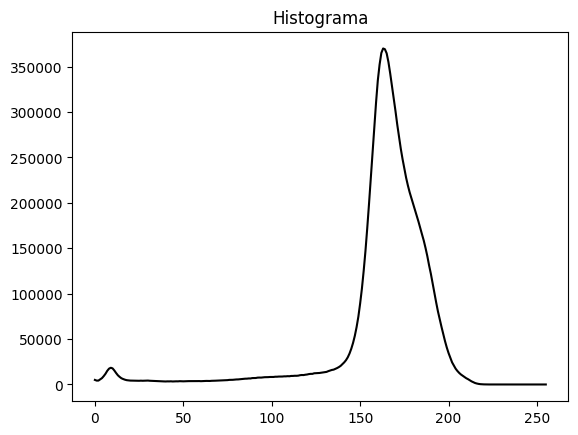

In [99]:
h = np.histogram(img,bins=256,range=(0,255))[0]
plt.plot (h,'-k')
plt.title("Histograma")
plt.show()

## Bounding box
- Usar interseção sobre união para descobrir a acurácia das boxes encontradas
- Os locais reais estão nos arquivos txt da base de dados (?)

The bounding box is an imaginary rectangular box that contains an object or a set of points. When used in digital image processing, the bounding box refers to the border’s coordinates that enclose an image. They are often used to bind or identify a target and serve as a reference point for object detection and create a collision box for that object

### Perfil vertical (coluna 500)
Binarizar primeiro, depois fazer o somatório dos pixels e usar pra ver se o pixel é background ou assinatura

(Como usar para encontrar a bounding box?)

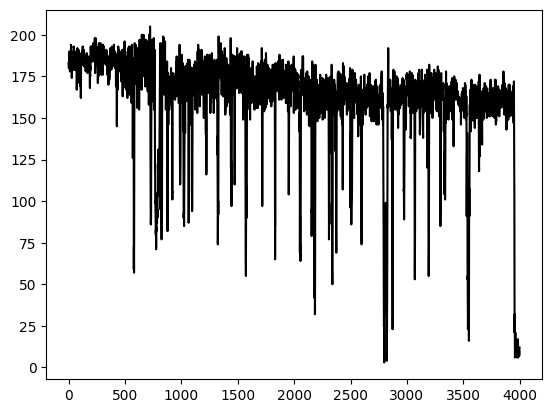

In [105]:
plt.plot(img[:,500],"-k")

### Perfil horizontal (linha 550)

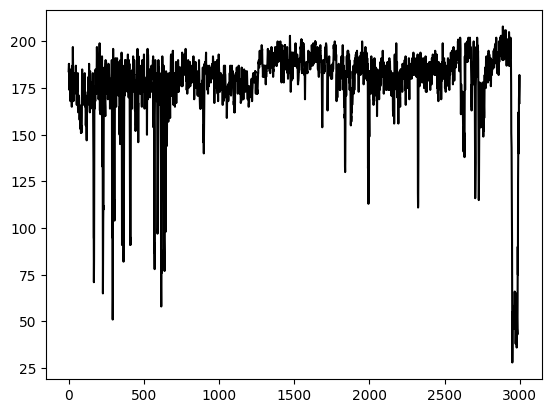

In [107]:
plt.plot(img[550,:],"-k")

## Algoritmos de segmentação
Mudanças bruscas nos níveis de cinza (Descontinuidades):
- Pontos isolados
- Linhas
- Bordas na imagem

Similaridades:
- Limiarização (binarização)
- Crescimento de regiões
- Divisão e fusão de regiões


### Bordas - Sobel

134 0 (4000, 3000)


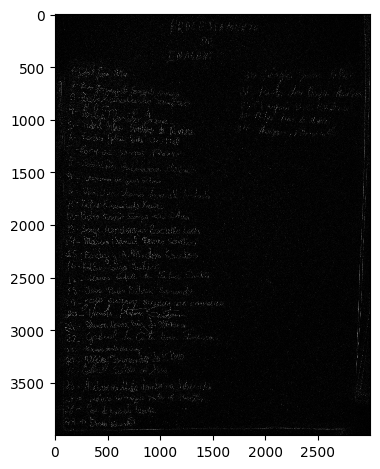

In [115]:
sobel_ = (sobel(img)*255).astype("uint8")
print(sobel_.max(), sobel_.min(), sobel_.shape)
io.imshow(sobel_)

# Dando zoom, ainda é possível ler algumas assinaturas, mas só se a letra
# for grossa o suficiente

In [113]:
#https://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imsave
io.imsave("teste_sobel.jpg",sobel_)

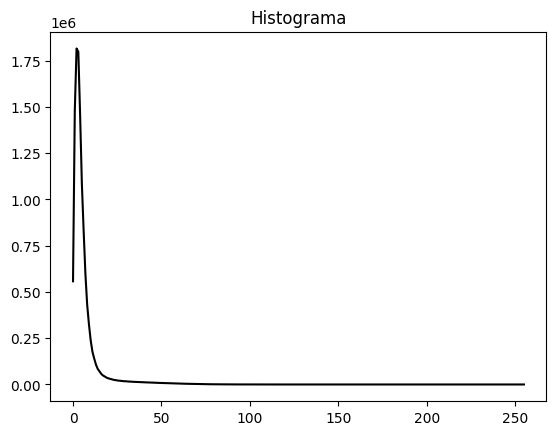

In [114]:
h = np.histogram(sobel_,bins=256,range=(0,255))[0]
plt.plot (h,'-k')
plt.title("Histograma")
plt.show()